In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dir='/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'
test_dir=train_dir+'../valid'

In [3]:
size=100
train_generator=keras.preprocessing.image.ImageDataGenerator(
rescale=1/255.0,
rotation_range=50,
zoom_range=0.2,
preprocessing_function=None,
validation_split=0.1).flow_from_directory(
                                    directory=train_dir,
                                    subset='training',
                                    batch_size=64,
                                    color_mode='rgb',
                                    target_size=(size,size),
                                    class_mode='categorical',
                                    shuffle=True )
                     


valid_generator=keras.preprocessing.image.ImageDataGenerator(
rescale=1/255.0,
rotation_range=50,
zoom_range=0.2,
validation_split=0.1).flow_from_directory(
                                    directory=train_dir,
                                    subset='validation',
                                    batch_size=64,
                                    color_mode='rgb',  
                                    target_size=(size,size),
                                    class_mode='categorical')
                     


test_generator=keras.preprocessing.image.ImageDataGenerator(
rescale=1/255.0,
rotation_range=50,
zoom_range=0.2).flow_from_directory(
                                directory=test_dir,
                                batch_size=64,
                                color_mode='rgb',  
                                target_size=(size,size),
                                class_mode='categorical')

Found 63282 images belonging to 38 classes.
Found 7013 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


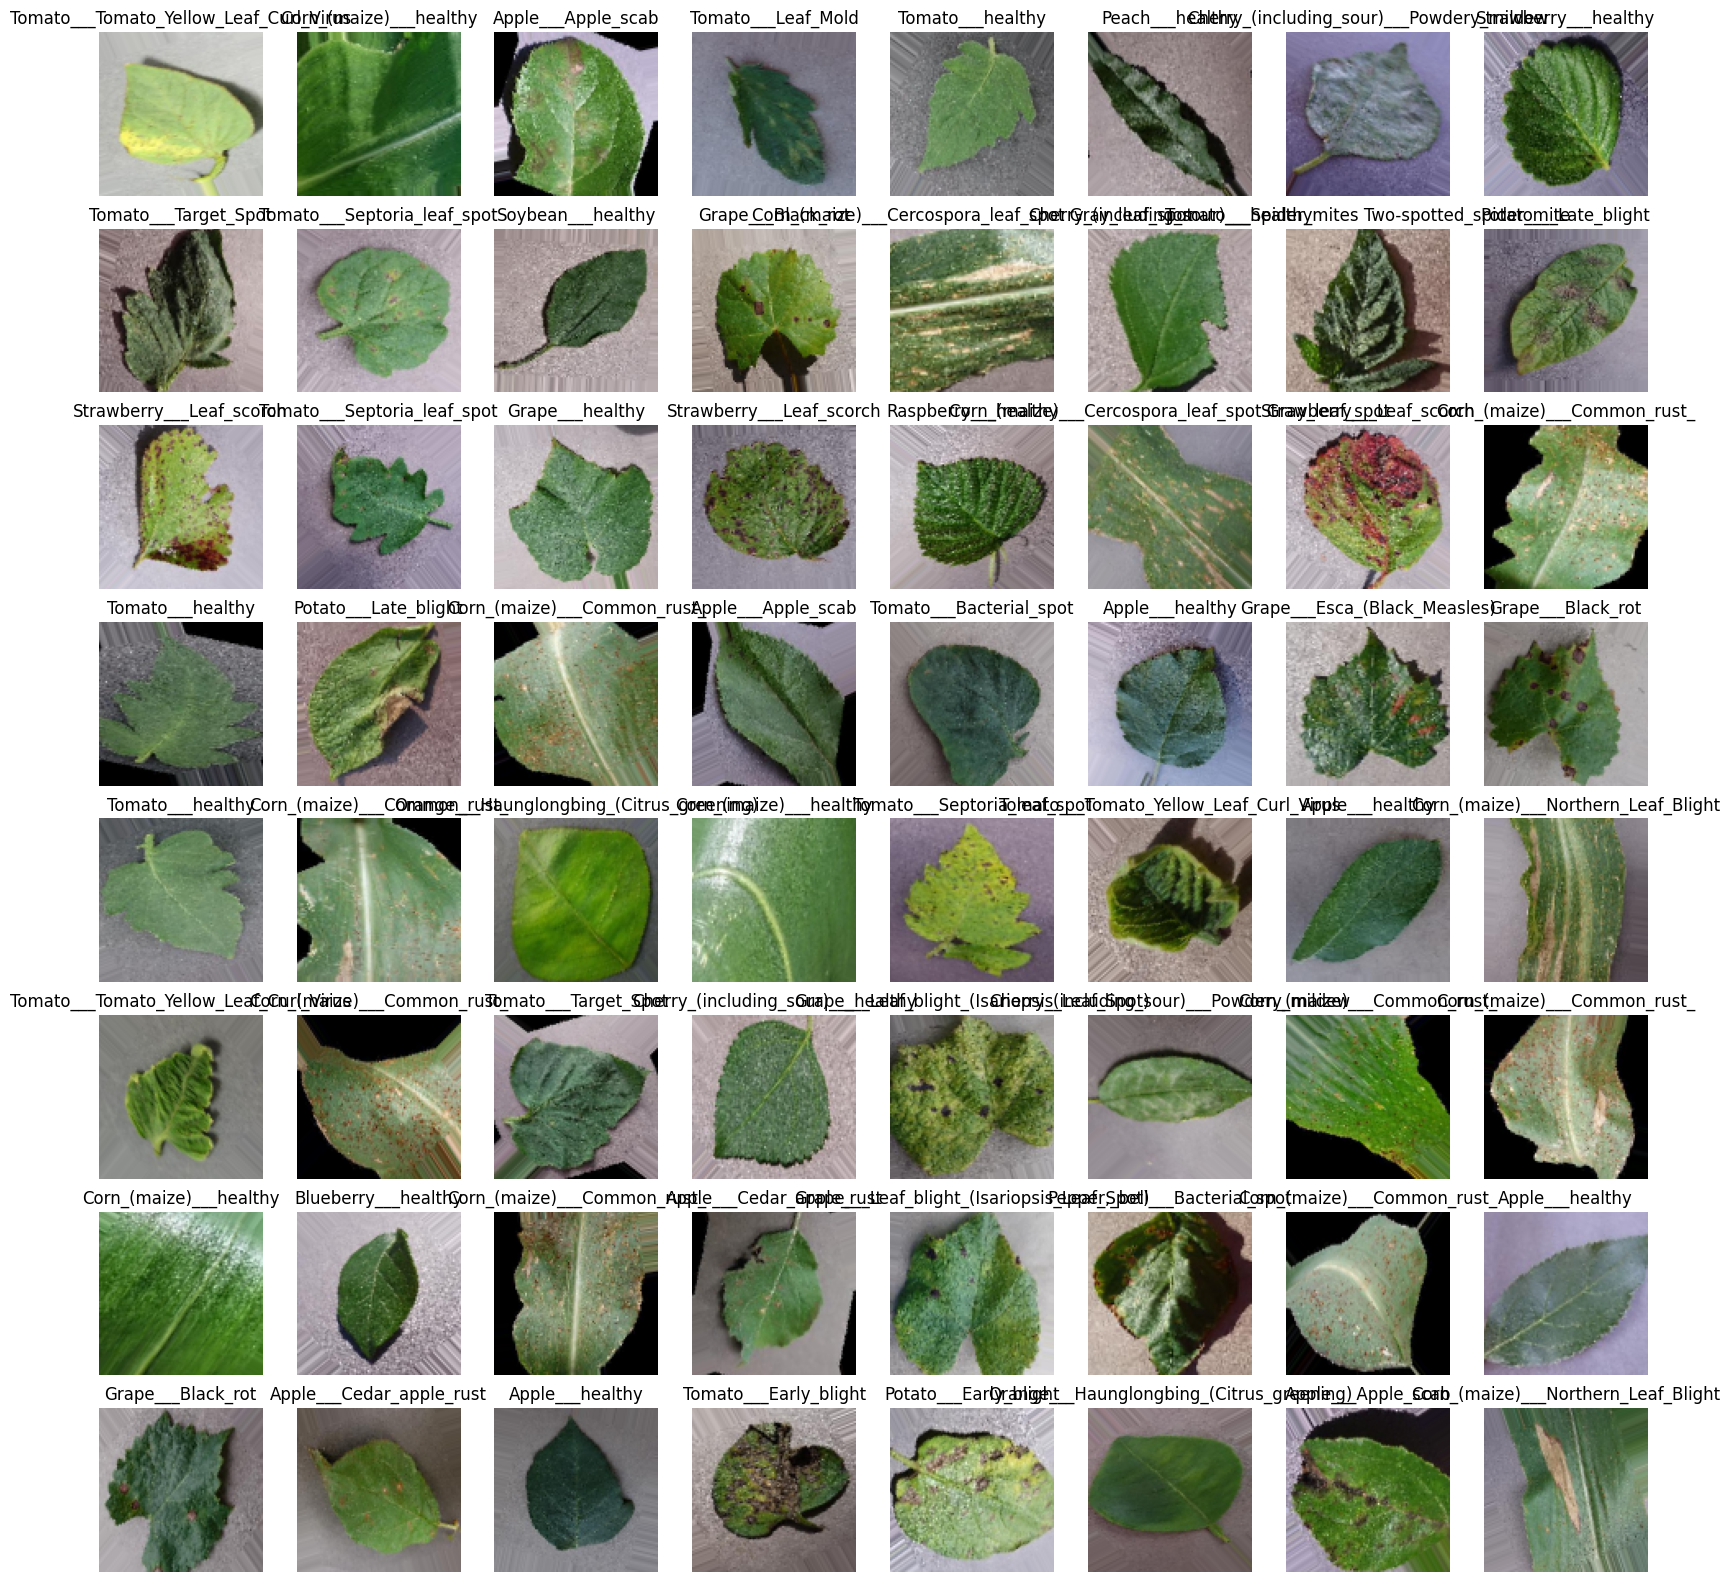

In [4]:
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20, 20))

for x_batch, y_batch in train_generator:
    for i in range(64):
        plt.subplot(8, 8, i + 1)  
        plt.imshow(x_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]])
        plt.axis('off')  

    plt.show()
    break

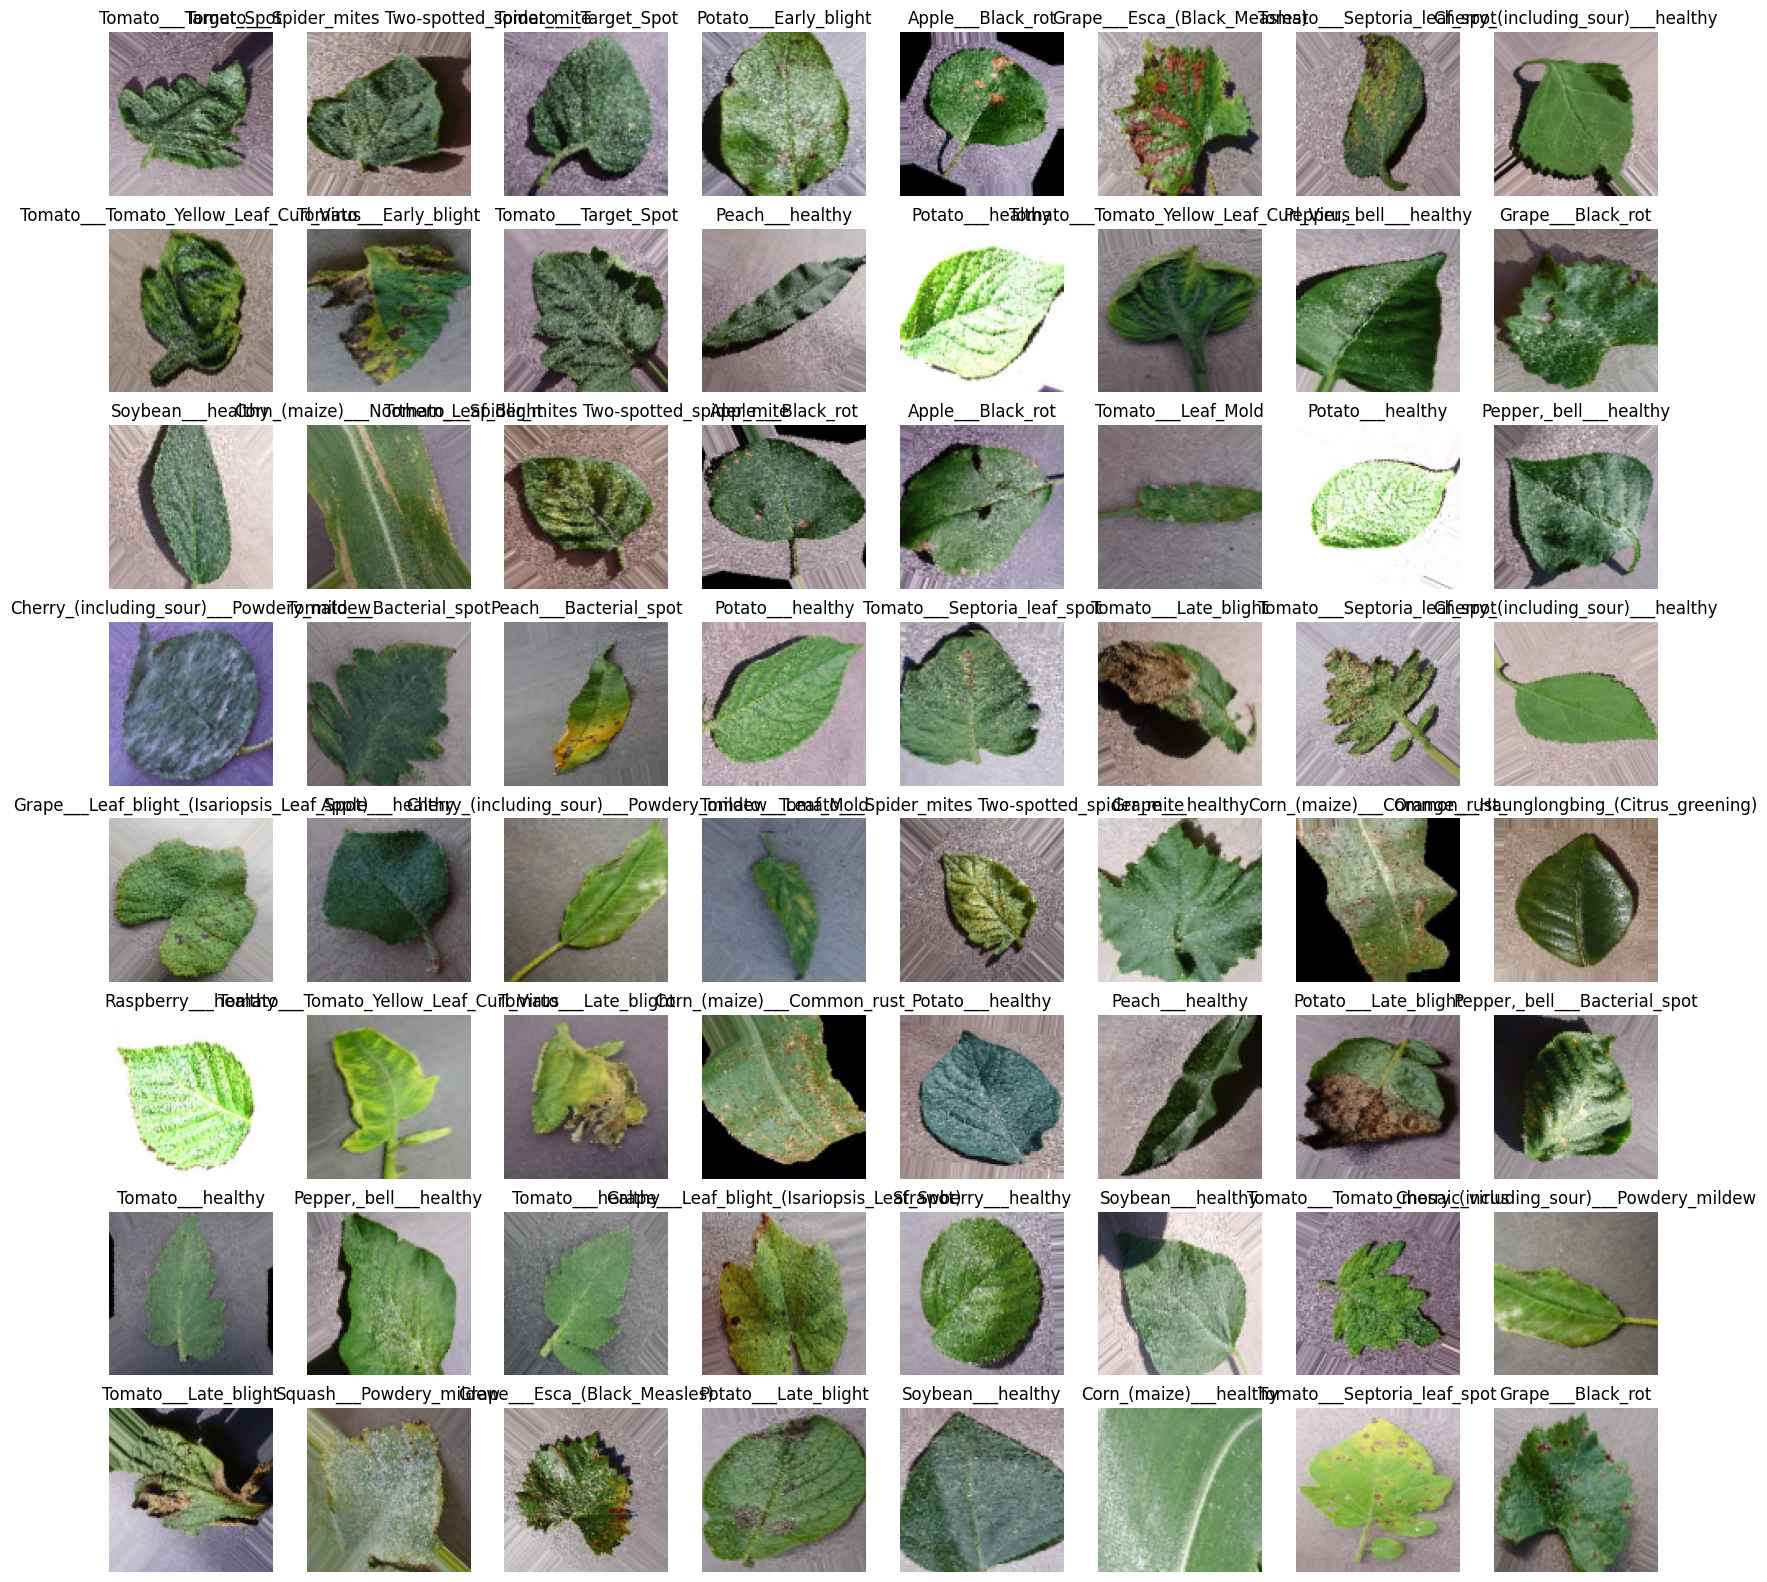

In [5]:
classes = list(test_generator.class_indices.keys())
plt.figure(figsize=(20, 20))

for x_batch, y_batch in test_generator:
    for i in range(64):
        plt.subplot(8, 8, i + 1)  
        plt.imshow(x_batch[i])
        plt.title(classes[np.where(y_batch[i] == 1)[0][0]])
        plt.axis('off')  

    plt.show()
    break

In [6]:
input_shape = (100, 100, 3)  # Adjust height, width, and channels as needed


# Define inputs
inputs = tf.keras.Input(shape=input_shape)
# print(inputs )
# model_name='VGG19'
# Load the base model
base_model = keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_tensor=inputs)
# Freeze the base model layers
base_model.trainable = False

x = tf.keras.layers.Flatten()(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.Dense(64, activation='relu')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(38, activation='softmax')(x)

# Create model
model = tf.keras.models.Model(inputs = inputs, outputs = outputs)



/tmp/ipykernel_23/3100302736.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_tensor=inputs)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
model.compile(loss="categorical_crossentropy", 
              optimizer= keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy",'precision','recall'])


In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 50, 50,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 50, 50,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 50, 50,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 50, 50,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 50, 50,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 50, 50,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 50, 50,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 50, 50,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 50, 50,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 50, 50,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 50, 50,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 51, 51,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 25, 25,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 25, 25,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 25, 25,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 25, 25,    │      2,304 │ block_1_depthwis

 Total params: 4,116,070 (15.70 MB)

 Trainable params: 1,857,062 (7.08 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

In [9]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [10]:
history = model.fit(train_generator,
                    epochs = 30,
                    batch_size=64,
                    validation_data = valid_generator,
                    callbacks = early_stopping
                    )

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1729962975.311101      88 service.cc:145] XLA service 0x7ec1140027e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729962975.311170      88 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/989 ━━━━━━━━━━━━━━━━━━━━ 4:01:54 15s/step - accuracy: 0.0156 - loss: 4.6620 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1729962981.218869      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


989/989 ━━━━━━━━━━━━━━━━━━━━ 452s 442ms/step - accuracy: 0.7044 - loss: 1.0051 - precision: 0.8286 - recall: 0.6097 - val_accuracy: 0.7911 - val_loss: 0.6776 - val_precision: 0.8389 - val_recall: 0.7560
Epoch 2/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 256s 257ms/step - accuracy: 0.8333 - loss: 0.5153 - precision: 0.8826 - recall: 0.7926 - val_accuracy: 0.8091 - val_loss: 0.6210 - val_precision: 0.8506 - val_recall: 0.7810
Epoch 3/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 252s 253ms/step - accuracy: 0.8534 - loss: 0.4471 - precision: 0.8930 - recall: 0.8212 - val_accuracy: 0.8186 - val_loss: 0.5905 - val_precision: 0.8558 - val_recall: 0.7905
Epoch 4/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 260s 261ms/step - accuracy: 0.8619 - loss: 0.4178 - precision: 0.8986 - recall: 0.8339 - val_accuracy: 0.8370 - val_loss: 0.5009 - val_precision: 0.8757 - val_recall: 0.8109
Epoch 5/30
989/989 ━━━━━━━━━━━━━━━━━━━━ 259s 260ms/step - accuracy: 0.8709 - loss: 0.3895 - precision: 0.9020 - recall: 0.8444 - val_accuracy: 0.8564 - val

In [11]:
model.save('model.h5')


In [12]:
train_loss, train_accuracy, train_precision, train_recall= model.evaluate(train_generator)
test_loss, test_accuracy, test_precision, test_recall= model.evaluate(test_generator)

989/989 ━━━━━━━━━━━━━━━━━━━━ 231s 234ms/step - accuracy: 0.9241 - loss: 0.2204 - precision: 0.9409 - recall: 0.9111
275/275 ━━━━━━━━━━━━━━━━━━━━ 141s 515ms/step - accuracy: 0.9079 - loss: 0.2773 - precision: 0.9264 - recall: 0.8927


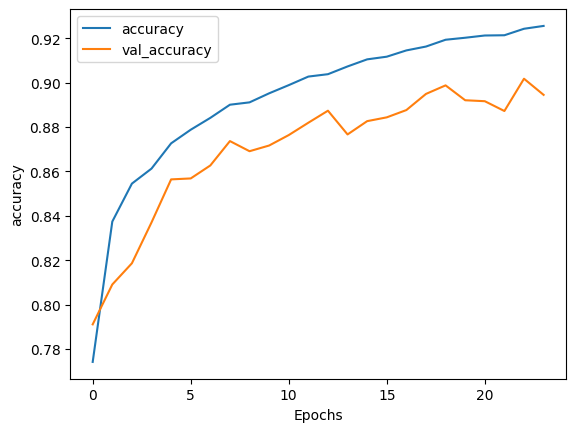

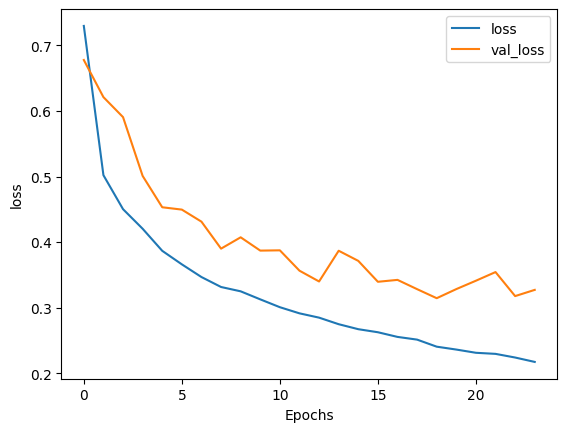

In [13]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+ string ])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_train_pred = model.predict(train_generator)
y_test_pred =  model.predict(test_generator)

y_train_pred_class = np.argmax(y_train_pred, axis=1)
y_test_pred_class = np.argmax(y_test_pred, axis=1)

# Get the true class labels
y_train_true = train_generator.classes
y_test_true = test_generator.classes


f1_train = f1_score(y_train_true, y_train_pred_class, average='weighted')
f1_test = f1_score(y_test_true, y_test_pred_class, average='weighted')

989/989 ━━━━━━━━━━━━━━━━━━━━ 235s 235ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 67s 242ms/step


In [15]:
data = {
    'model': ['MobileNetV2'],
    'Accuracy train': [train_accuracy],
    'Accuracy test': [test_accuracy],
    'Precision train': [train_precision],
    'Precision test': [test_precision],
    'Recall train': [train_recall],
    'Recall test': [test_recall],
    'F1-score train': [f1_train],
    'F1-score test': [f1_test]
}


metrics_df = pd.DataFrame(data)
metrics_df

model  Accuracy train  Accuracy test  Precision train  \
0  MobileNetV2        0.925097       0.905475         0.941751   

   Precision test  Recall train  Recall test  F1-score train  F1-score test  
0        0.925208      0.912092     0.891247        0.026676       0.025824